In [15]:
# Descarga tu repositorio desde GitHub
#!git clone git@github.com:Guesseppe100/Perceptron.git


Accuracy final: 50.0%


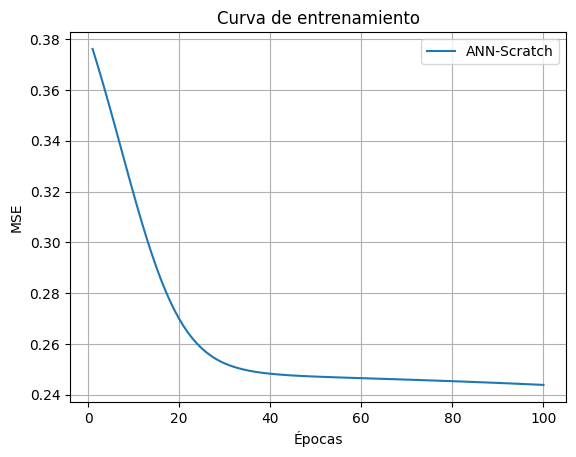

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ------------- Datos (ejemplo auto-contenido) -------------
rng = np.random.default_rng(0)
# Dos nubes 2D separables
X0 = rng.normal(loc=-1.0, scale=0.5, size=(5, 2))
X1 = rng.normal(loc=+1.0, scale=0.5, size=(5, 2))
X = np.vstack([X0, X1])                      # (10,2)

# Etiquetas one-hot (10 x 2)
y1 = np.hstack([np.ones(5), np.zeros(5)])    # clase 0
y2 = np.hstack([np.zeros(5), np.ones(5)])    # clase 1
Y = np.vstack((y1, y2)).T                    # (10,2)

# ------------- Inicialización de parámetros -------------
# Capa 1-2: (2 -> 2)  W2 (2x2), b2 (2x1)
W2 = rng.uniform(0, 1, (2, 2))
b2 = rng.uniform(0, 1, (2, 1))
# Capa 2-3: (2 -> 3)  W3 (3x2), b3 (3x1)
W3 = rng.uniform(0, 1, (3, 2))
b3 = rng.uniform(0, 1, (3, 1))
# Capa 3-4: (3 -> 2)  W4 (2x3), b4 (2x1)
W4 = rng.uniform(0, 1, (2, 3))
b4 = rng.uniform(0, 1, (2, 1))

# ------------- Funciones auxiliares -------------
def sigmoid(z):
    # Sigmoide estable
    z = np.clip(z, -60, 60)
    return 1.0 / (1.0 + np.exp(-z))

def forward(x, W2, b2, W3, b3, W4, b4):
    a2 = sigmoid(W2 @ x + b2)     # (2x1)
    a3 = sigmoid(W3 @ a2 + b3)    # (3x1)
    a4 = sigmoid(W4 @ a3 + b4)    # (2x1)
    return a2, a3, a4

def mse_loss(X, Y, W2, b2, W3, b3, W4, b4):
    total = 0.0
    for i in range(len(X)):
        xi = X[i].reshape(-1, 1)      # (2,1)
        yi = Y[i].reshape(-1, 1)      # (2,1)
        _, _, a4 = forward(xi, W2, b2, W3, b3, W4, b4)
        total += np.mean((yi - a4) ** 2)
    return total / len(X)

def accuracy(X, Y, W2, b2, W3, b3, W4, b4):
    correct = 0
    for i in range(len(X)):
        xi = X[i].reshape(-1, 1)
        yi = Y[i]
        _, _, a4 = forward(xi, W2, b2, W3, b3, W4, b4)
        pred = np.argmax(a4.ravel())
        if pred == np.argmax(yi):
            correct += 1
    return correct / len(X)

# ------------- Entrenamiento -------------
eta = 0.05
epochs = 100
losses = []

for epoch in range(epochs):
    # barajar índices
    idx = rng.permutation(len(X))
    for i in idx:
        x = X[i].reshape(-1, 1)   # (2,1)
        y = Y[i].reshape(-1, 1)   # (2,1)

        # Forward
        a2 = sigmoid(W2 @ x + b2)
        a3 = sigmoid(W3 @ a2 + b3)
        a4 = sigmoid(W4 @ a3 + b4)

        # Backward (MSE con sigmoide)
        delta4 = (a4 - y) * a4 * (1 - a4)          # (2,1)
        delta3 = (W4.T @ delta4) * a3 * (1 - a3)   # (3,1)
        delta2 = (W3.T @ delta3) * a2 * (1 - a2)   # (2,1)

        # Gradientes y actualización (SGD)
        W4 -= eta * (delta4 @ a3.T)    # (2,1)@(1,3) -> (2,3)
        b4 -= eta * delta4
        W3 -= eta * (delta3 @ a2.T)    # (3,1)@(1,2) -> (3,2)
        b3 -= eta * delta3
        W2 -= eta * (delta2 @ x.T)     # (2,1)@(1,2) -> (2,2)
        b2 -= eta * delta2

    # pérdida por época (dataset completo)
    losses.append(mse_loss(X, Y, W2, b2, W3, b3, W4, b4))

# ------------- Reporte y gráfica -------------
acc = accuracy(X, Y, W2, b2, W3, b3, W4, b4)
print(f"Accuracy final: {acc*100:.1f}%")

plt.figure()
plt.plot(range(1, epochs + 1), losses, label="ANN-Scratch")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.title("Curva de entrenamiento")
plt.legend()
plt.grid(True)
plt.show()
